In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [5]:
from google.colab import files
uploaded = files.upload()

Saving boom_bikes.csv to boom_bikes.csv


### Data 불러오기

In [15]:
data = pd.read_csv("/content/boom_bikes.csv")
data.shape

(730, 16)

In [16]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


데이터 특성 정리  

  - instant: 인덱스 번호
	- dteday : 날짜
	- season : 계절 (1:봄, 2:여름, 3:가을, 4:겨울)
	- yr : 연도 (0: 2018, 1:2019)
	- mnth : 월 
	- holiday : 공휴일(주말미포함)이면 1, 아니면 2 
	- weekday : 요일 (일요일 0 ~ 토요일 6)
	- workingday : 공휴일이 아닌 평일 1, 주말 및 공휴일 0.
	- weathersit : 
		- 1: 맑음
		- 2: 흐림
		- 3: 가벼운 비, 눈
		- 4: 강한 호우 - 폭우, 천둥, 폭설 등 
	- temp : 섭씨온도
	- atemp: 체감온도
	- hum: 습도
	- windspeed: 풍속
	- casual: 일반 사용자 수
	- registered: 등록된 사용자 수
	- cnt: 일반 + 등록 사용자 수(total)


### 데이터 전처리

In [17]:
data = data. set_index('instant')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [19]:
data.head(5)

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [20]:
# dteday datatime type 변경하고 연월이 있기때문에 일만 추출해서 새로운 column추가.

from datetime import date

data.dteday = pd.to_datetime(data.dteday)
data["day"] = [i.day for i in data.dteday]

In [25]:
# 중복 column 삭제

data.drop(['dteday','registered','casual'],axis=1, inplace=True)

In [26]:
# 기상, 계절, 월, 요일에 대해서 str으로 인코딩

data.weathersit = data.weathersit.map({1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})
data.season = data.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
data.mnth = data.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
data.weekday = data.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [27]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day
instant,,,,,,,,,,,,,
1,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985,1
2,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801,1
3,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1
4,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1
5,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1


### EDA

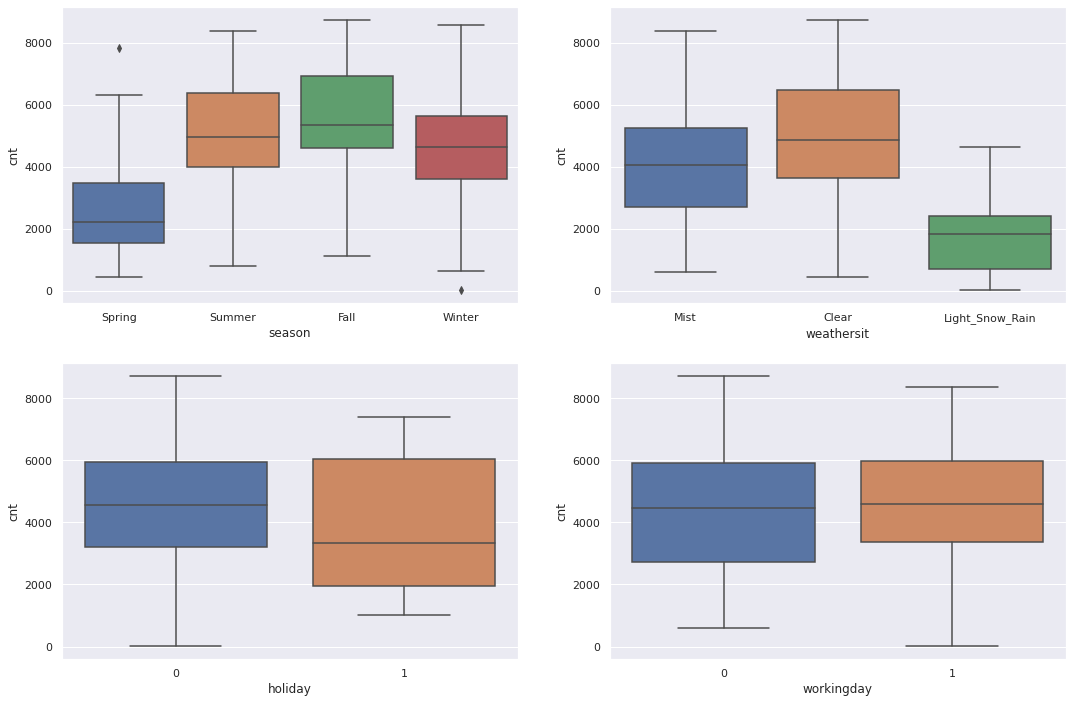

In [28]:
# 계절, 기상, 휴일, 공휴일, 평일에 따른 자전거 대여 횟수 분포 확인

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18,12))
sns.boxplot(x="season", y="cnt", data=data, ax=ax1)
sns.boxplot(x="weathersit", y="cnt", data=data, ax=ax2)
sns.boxplot(x="holiday", y="cnt", data=data, ax=ax3)
sns.boxplot(x="workingday", y="cnt", data=data, ax=ax4)

대여카운트와 관련된 범주형 카테고리에 대한 분포 확인 결과
><li> 카테고리별 특별한 이상치가 없음<br>
><li> 여름과 가을은 다른 계절에 비해 더 많이 대여<br>
><li> 맑은 날 또한 더 많이 대여<br>
><li> 휴일과 일반적인 평일에 대해서는 큰 차이는 없음

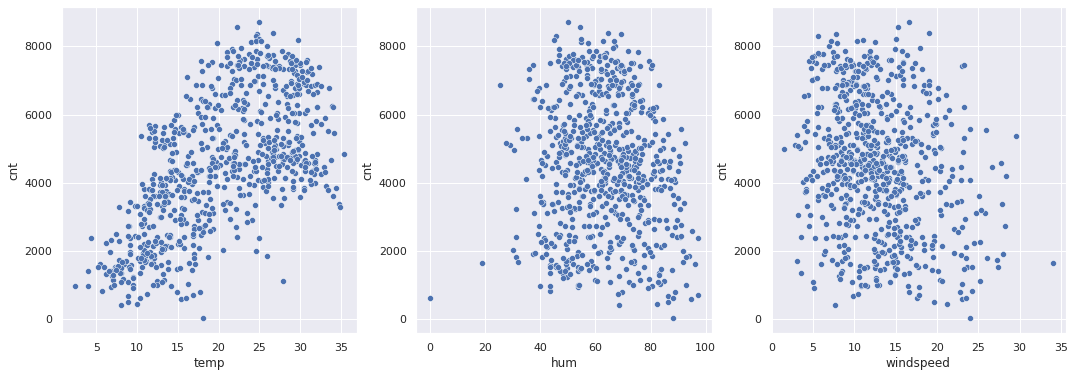

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
sns.scatterplot(x="temp", y="cnt", data=data, ax=ax1)
sns.scatterplot(x="hum", y="cnt", data=data, ax=ax2)
sns.scatterplot(x="windspeed", y="cnt", data=data, ax=ax3)
fig.show()

연속형 카테고리와 대여카운트의 선형관계 확인
> 온도와는 선형관계 <br>
> 습도와 풍속은 패턴없음

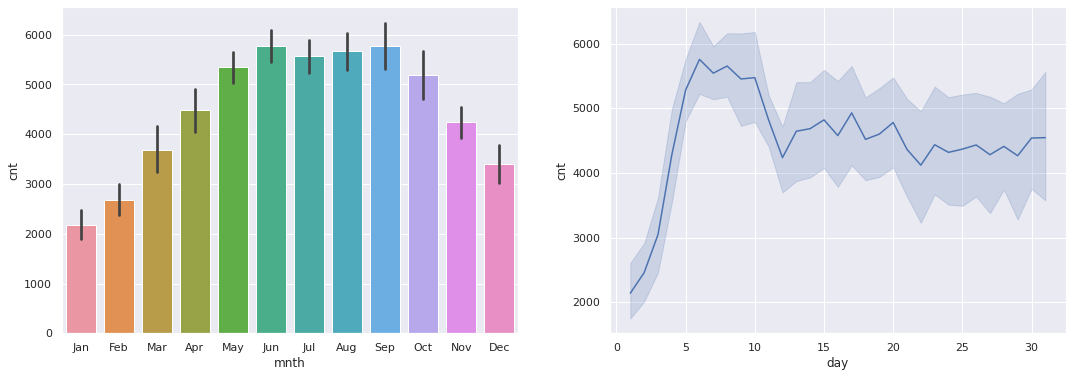

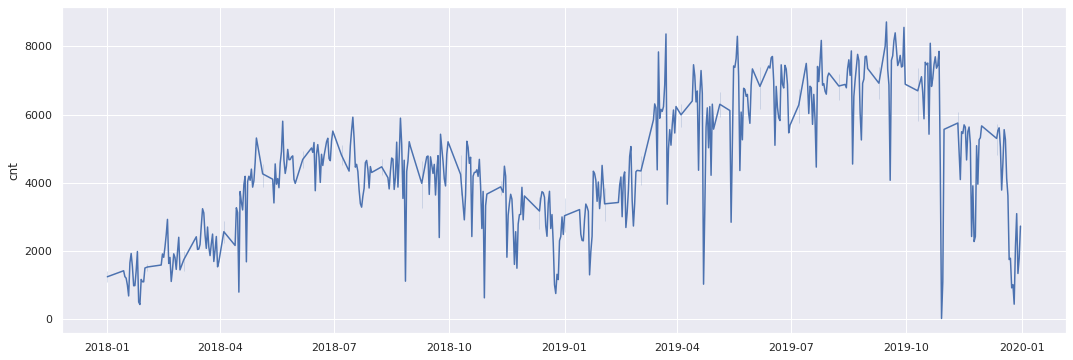

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,6))
sns.barplot(x="mnth", y="cnt", data=data, ax=ax1)
sns.lineplot(x="day", y="cnt", data=data, ax=ax2)
fig.show()

sales = [str(i)+'-'+str(j)+'-'+str(k) for i,j,k in zip(data.day, data.mnth, data.yr.map({0:'2018',1:'2019'}))]
fig, (ax1) = plt.subplots(1, 1, figsize=(18,6))
sns.lineplot(x=pd.to_datetime(sales), y=data.cnt, ax=ax1)

연도, 월, 요일에 따른 대여수 확인
> <li> 5~10월에 대여량 증가
> <li> 0~5일에 대여량 높음
> <li> 18년부터 대여수는 점차 증가했으나 19년 말부터 하락

In [31]:
# 범주형 카테고리에 대해 One-Hot Encoding 진행
season_dummy = pd.get_dummies(data.season,drop_first=True)
weather_dummy = pd.get_dummies(data.weathersit,drop_first=True)
month_dummy = pd.get_dummies(data.mnth,drop_first=True)
weekday_dummy = pd.get_dummies(data.weekday,drop_first=True)

final_df = data.join(season_dummy)
final_df = final_df.join(weather_dummy)
final_df = final_df.join(month_dummy)
final_df = final_df.join(weekday_dummy)
final_df.drop(['season','weathersit','mnth','weekday'], axis=1, inplace=True)

print(final_df.shape)
final_df.head()

(730, 31)


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
instant,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,1,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,1,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,1,...,0,0,0,0,0,0,0,0,0,1


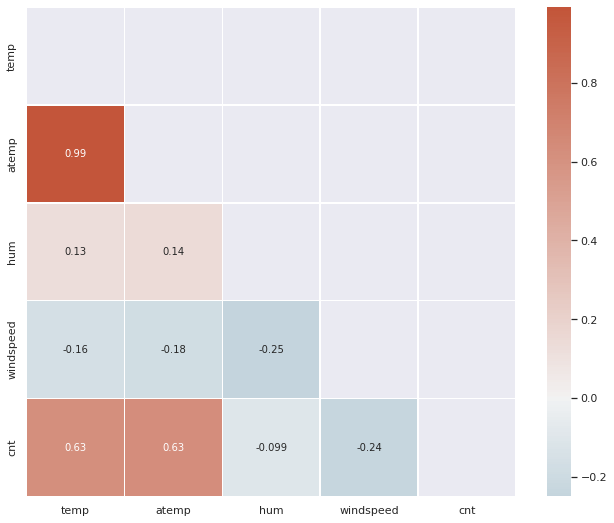

In [33]:
# 데이터별 상관관계 확인

corr = data[['temp','atemp','hum','windspeed','cnt']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,square=True, linewidths=.5, annot=True)
f.show()

위에 따라 온도와 대여량에 높은 선형관계가 있음을 확인.

In [35]:
final_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,day,Spring,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,15.720548,0.246575,...,0.084932,0.082192,0.084932,0.082192,0.143836,0.143836,0.143836,0.142466,0.142466,0.141096
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,8.802278,0.431313,...,0.278971,0.274845,0.278971,0.274845,0.351164,0.351164,0.351164,0.349767,0.349767,0.348359
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,8.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,23.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,31.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Modeling

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

### <b>Model 1: -> BASE</b>

In [37]:
# 선형회귀 모델 구축
def lin_reg(X_train, y_train, X_test, y_test):

  X_train = sm.add_constant(X_train) 

  model = sm.OLS(y_train, X_train).fit()

  X_test = sm.add_constant(X_test)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
  print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))
  print(model.summary())
  
  sns.regplot(y_test,y_pred_test)

  return model

In [38]:
# 테스트셋 분리

X = final_df.drop('cnt', axis=1)
y = final_df.cnt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [40]:
# 데이터 정규화

num_cols = ['temp','atemp','hum','windspeed']
scaler = MinMaxScaler()
scaler.fit(X_train[num_cols])
train_scaled = scaler.transform(X_train[num_cols])
test_scaled = scaler.transform(X_test[num_cols])
X_train[num_cols] = train_scaled
X_test[num_cols] = test_scaled

R2 Score of the training data: 0.8581616896806937
R2 Score of the testing data: 0.8127892013116169
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     100.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.17e-183
Time:                        07:07:32   Log-Likelihood:                -4094.2
No. Observations:                 511   AIC:                             8248.
Df Residuals:                     481   BIC:                             8376.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

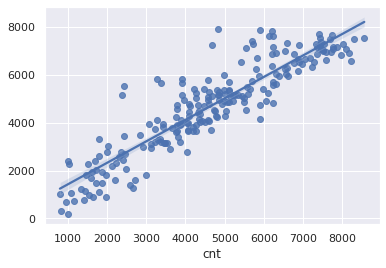

In [41]:
# base model 생성
model_1 = lin_reg(X_train, y_train, X_test, y_test)

- R2 : 85%, 84%.
- F값은 낮고 pvalue값이 높으며, multi-collinearity(다중공선성)으로 보임.
  - 독립변수들끼리 상관관계가 있을 가능성이 있고, pvalue값이 높아 예측에 유의미하지 않음
- VIF 활용 multi-collinearity 확인, 높은 pvalue값 처리

### <b>Model 2: VIF and P-Values </b>


- 가장 높은 VIF값과 높은 P-Values값을 가진 변수 삭제(하나씩 제거)
- 인코딩으로 column이 많아 VIF > 5, P-Value > 0.05 변수 제거

In [44]:
#base 모델에 pvalue 값을 확인하는 차트 같이 출력

def lin_reg_2(X_train, y_train, X_test, y_test):
  
  X_train = sm.add_constant(X_train) 

  model = sm.OLS(y_train, X_train).fit()

  X_test = sm.add_constant(X_test)

  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  print("R2 Score of the training data:",r2_score(y_pred = y_pred_train, y_true = y_train))
  print("R2 Score of the testing data:",r2_score(y_pred = y_pred_test, y_true = y_test))

  return model

In [45]:
# 모델에서 pvalue 값을 가져와 내림차순 정렬 후 반환

def get_pvalues(model):
  pval = pd.DataFrame(data= model.pvalues, columns=['Pvalue'])
  pval['feature'] = pval.index
  pval.reset_index(drop=True, inplace=True)
  pval['Pvalue'] = [round(i,3) for i in pval['Pvalue']]
  pval = pval[['feature','Pvalue']].sort_values('Pvalue', ascending=False)
  
  return pval

In [46]:
# 모델에서 VIF 값을 가져와 내림차순 정렬 후 반환

def get_VIF(X_train):
  
  columns = X_train.columns
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train.columns
  vif_data["VIF"] = [variance_inflation_factor(X_train[columns].values, i) for i in range(len(columns))]
  vif_data = vif_data.sort_values('VIF', ascending=False)

  return vif_data

In [47]:
'''
# 높은 VIF 값과 P-values값을 가진 변수를 차례로 하나씩 제거하고, 제거할때마다 다시 계산하여 값 도출 
'''
def pval_vif_feature_selection(X_train, X_test):
  flag_1 = False # VIF 높은 값 제거하면 True 반환
  flag_2 = False # P-Values 높은 값 제거하면 True 반환
  X_train_VIF = X_train
  cols = X_train_VIF.columns 
  
  while True:
    X_train_VIF = X_train[cols]
    X_test_VIF = X_test[cols]

    model = lin_reg_2(X_train_VIF, y_train, X_test_VIF, y_test)
    pvalues = get_pvalues(model) 
    
    if pvalues['Pvalue'].tolist()[0]>0.05: # Pvalue > 0.05 값 제거
      print("제거",pvalues['feature'].tolist()[0],"with Pvalue",pvalues['Pvalue'].tolist()[0])
      cols = cols.drop(pvalues['feature'].tolist()[0])
    else:
      if not flag_2:
        print("\n--------------------\n높은 pvalues 값 제거 - 추가 제거 변수 없음\n--------------------")
      flag_2 = True

    X_train_VIF = X_train[cols]
    vif_data = get_VIF(X_train_VIF)
    
    if vif_data['VIF'].tolist()[0]>5:
      print("Dropping",vif_data['feature'].tolist()[0],"with VIF",vif_data['VIF'].tolist()[0])
      cols = cols.drop(vif_data['feature'].tolist()[0])
    else:
      if not flag_1:
        print("\n--------------------\n높은 VIF 값 제거 - 추가 제거 변수 없음\n--------------------")
      flag_1 = True
    
    if flag_1 and flag_2:   # pvalue, VIF 값이 다 True이면 루트 종료
      print(vif_data,"\n")
      print(pvalues)
      return cols
    print()

In [48]:
X_train_VIF = X_train
X_test_VIF = X_test
columns = pval_vif_feature_selection(X_train_VIF, X_test_VIF)

R2 Score of the training data: 0.8581616896806937
R2 Score of the testing data: 0.8127892013116169
제거 Oct with Pvalue 0.95
Dropping workingday with VIF 84.89487399386223

R2 Score of the training data: 0.858160538837742
R2 Score of the testing data: 0.8128293080590745
제거 Aug with Pvalue 0.959
Dropping temp with VIF 389.4019743935505

R2 Score of the training data: 0.8556961115805488
R2 Score of the testing data: 0.8165561512005868
제거 Mar with Pvalue 0.994
Dropping hum with VIF 36.032982453334576

R2 Score of the training data: 0.847708028272398
R2 Score of the testing data: 0.8189713117492307
제거 Summer with Pvalue 0.849
Dropping atemp with VIF 11.155833850804278

R2 Score of the training data: 0.8139611591952276
R2 Score of the testing data: 0.7856658066313273
제거 Sat with Pvalue 0.963

--------------------
높은 VIF 값 제거 - 추가 제거 변수 없음
--------------------

R2 Score of the training data: 0.8139603291707969
R2 Score of the testing data: 0.7856199712604579
제거 Thu with Pvalue 0.615

R2 Score 

R2 Score of the training data: 0.8104566294022939
R2 Score of the testing data: 0.7822201267292601
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     141.1
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          9.35e-168
Time:                        07:35:22   Log-Likelihood:                -4168.3
No. Observations:                 511   AIC:                             8369.
Df Residuals:                     495   BIC:                             8436.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

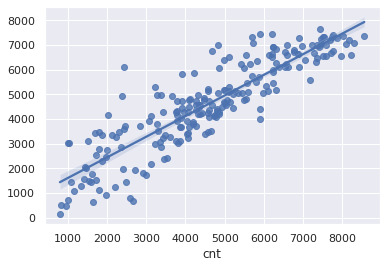

In [49]:
X_train_VIF = X_train[columns]
X_test_VIF = X_test[columns]
model_2 = lin_reg(X_train_VIF, y_train, X_test_VIF, y_test)

#### Model 3: RFE 

R2 Score of the training data: 0.8464635215947263
R2 Score of the testing data: 0.7921204518889258
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          1.97e-191
Time:                        07:47:10   Log-Likelihood:                -4114.5
No. Observations:                 511   AIC:                             8259.
Df Residuals:                     496   BIC:                             8323.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

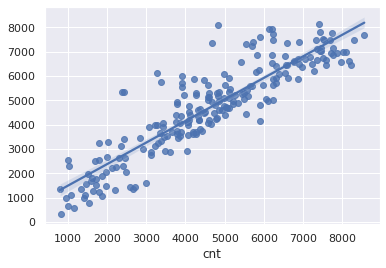

In [51]:
#  RFE 라이브러리 사용 동일과정 수행

from sklearn.feature_selection import RFE

lm = LinearRegression()

rfe = RFE(lm, step=1)
rfe = rfe.fit(X_train, y_train)
X_RFE = X_train[X_train.columns[rfe.support_]]
X_RFE_test = X_test[X_test.columns[rfe.support_]]

model_3 = lin_reg(X_RFE, y_train, X_RFE_test, y_test)

### 선형모델 성능 확인

---



In [52]:

def assumptions(model, X_train, X_test, y_train, y_test):

  # R2 score 출력
  r2_test = r2_score(y_test,model.predict(sm.add_constant(X_test)))
  r2_train = r2_score(y_train,model.predict(sm.add_constant(X_train)))
  print("R2 for training set:",r2_train,"\nR2 for test set:",r2_test)

  # 잔차 확인
  y_pred = model.predict(sm.add_constant(X_train))
  residuals = y_train.values - y_pred
  print("RME(잔차) :",round(residuals.mean(),3))

  # 등분산성 확인
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(28,6))
  sns.scatterplot(y_pred,residuals, ax=ax1)
  ax1.set_xlabel("Residuals")
  ax1.set_ylabel("Predictions")
  ax1.set_title("등분산성")
  sns.lineplot([0,8000],[0,0],color='red', ax=ax1)

  # 오차항 확인
  sns.distplot(residuals, ax=ax2)
  ax2.set_xlabel("Residuals")
  ax2.set_title("오차")

  # 공분산성 확인
  cmap = sns.diverging_palette(230, 20, as_cmap=True)
  sns.heatmap(X_train.corr(), cmap=cmap, ax=ax3)
  ax3.set_title("공분산성")

1: 등분산성(분산 분포) 확인<br>
2: 잔차의 분포 확인<br>
3: 다중 공산성 확인<br>

R2 for training set: 0.8464635215947263 
R2 for test set: 0.7921204518889258
RME(잔차) : 0.0


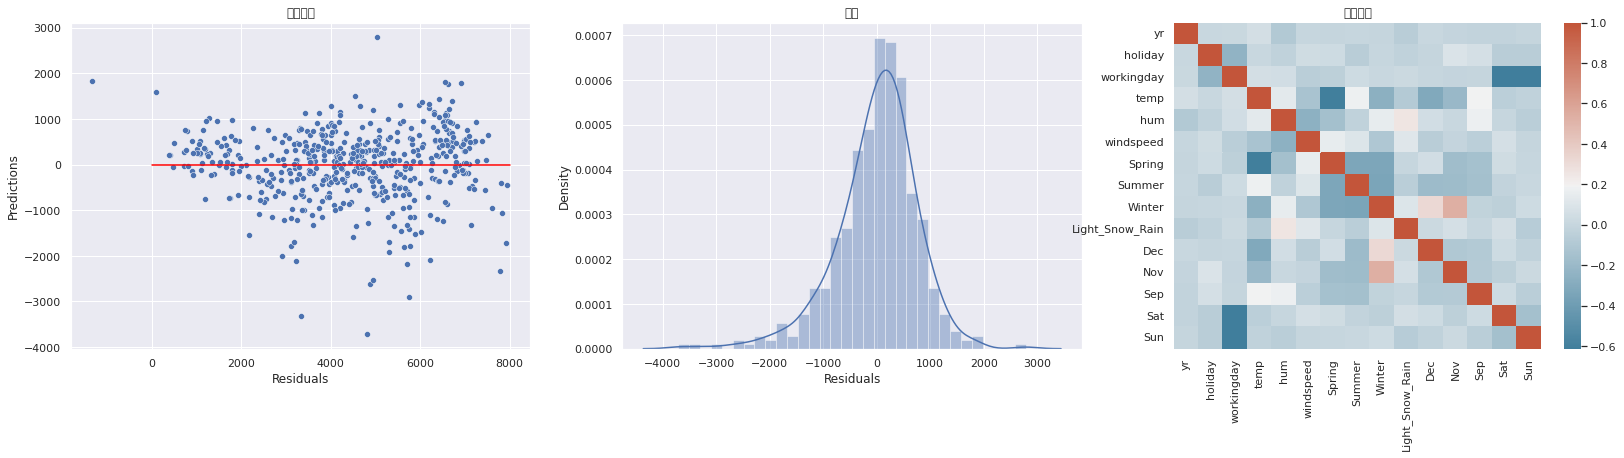

In [53]:
# Model 3
assumptions(model_3,X_RFE, X_RFE_test,y_train,y_test)

R2 for training set: 0.8104566294022939 
R2 for test set: 0.7822201267292601
RME(잔차) : 0.0


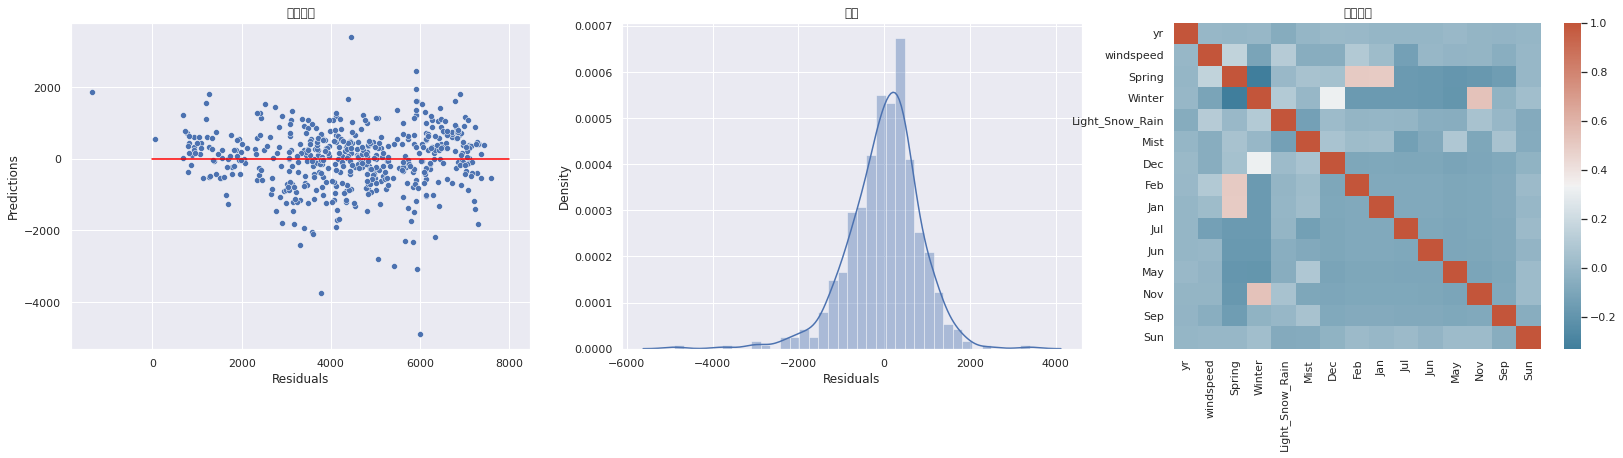

In [54]:
# Model 2 
assumptions(model_2,X_train[columns], X_test[columns],y_train,y_test)

# 결론
- 다중공산성문제 해결 후 VIF, Pvalues 값제거와 RFE 라이브러리를 통해 구현된 model 2,3 모두 선형회귀에 부합.
- R2값이 조금 더 높은 model3을 활용해 하루 대여량 예측 가능.

